In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [35]:
df = pd.read_csv('diabetes.csv')

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


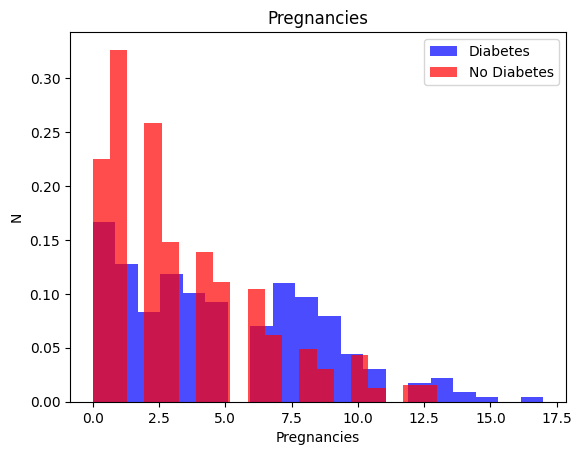

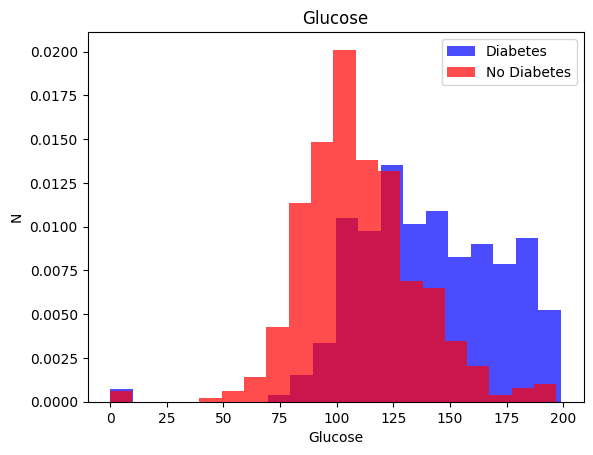

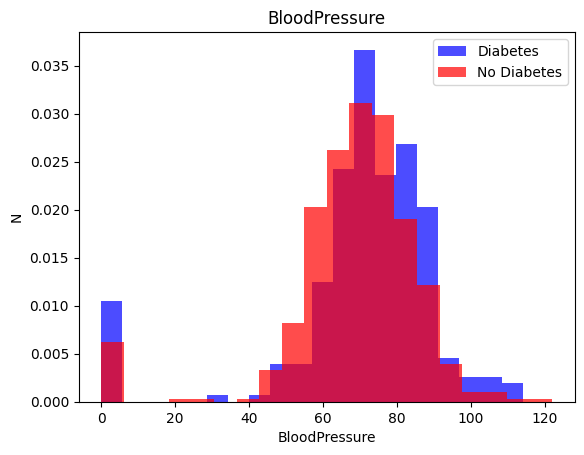

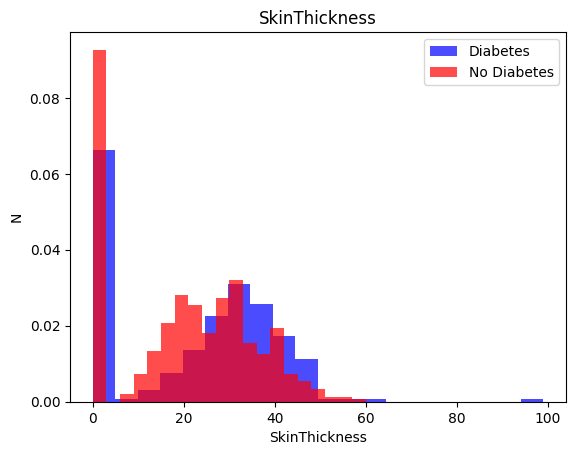

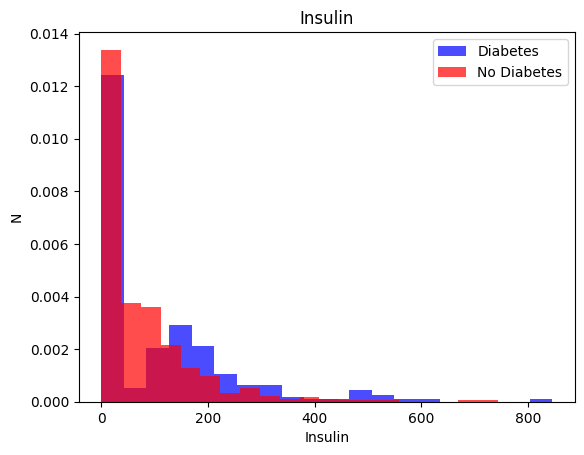

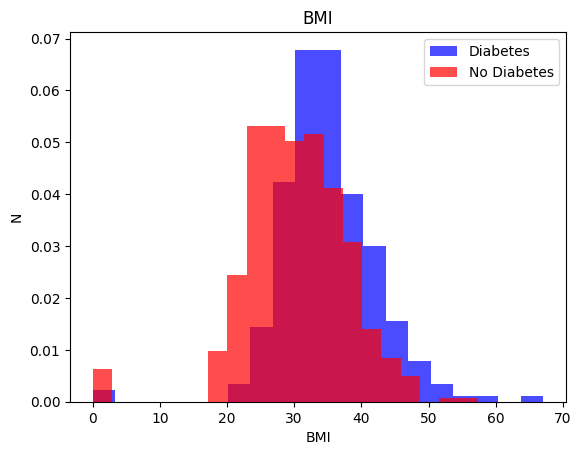

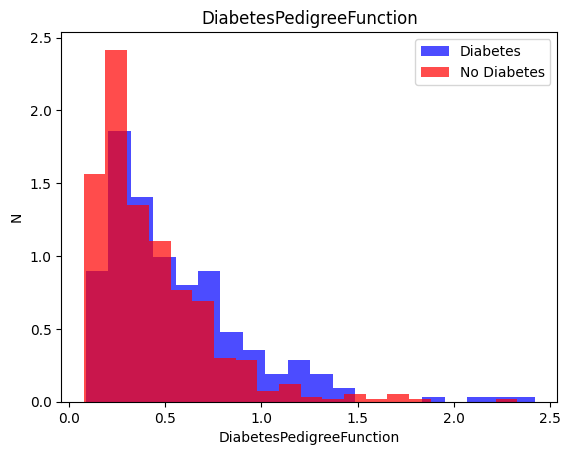

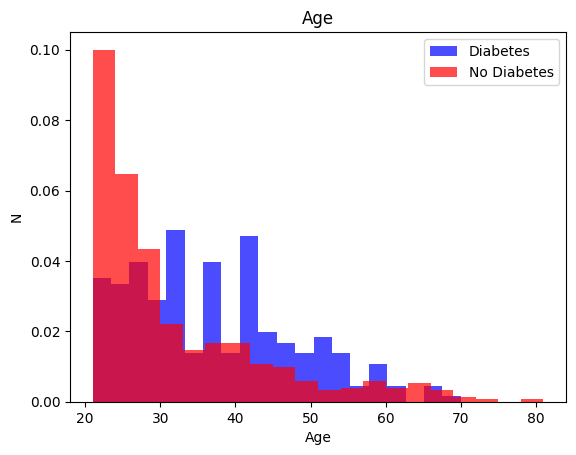

In [37]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=20)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='No Diabetes', alpha=0.7, density=True,bins=20)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [38]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [39]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [40]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [41]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [43]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

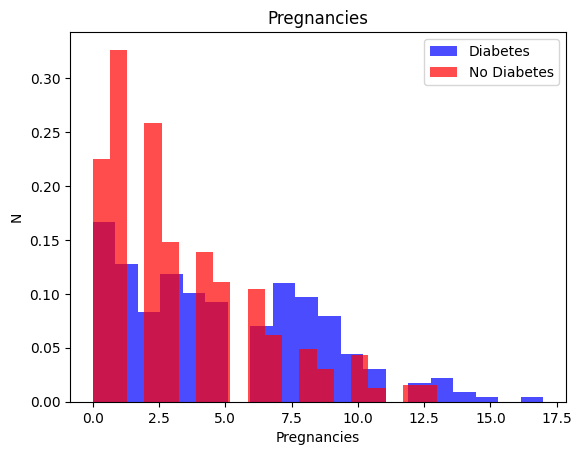

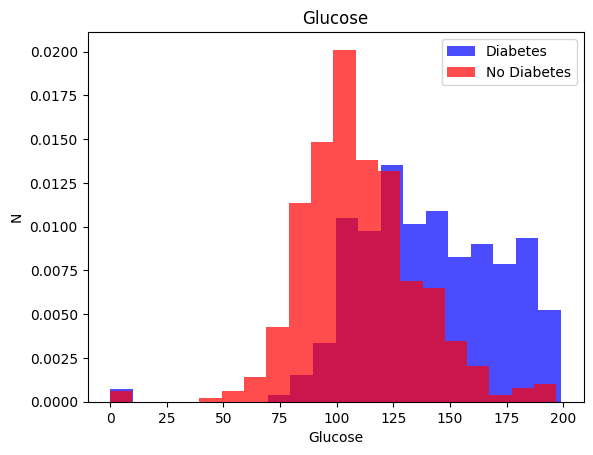

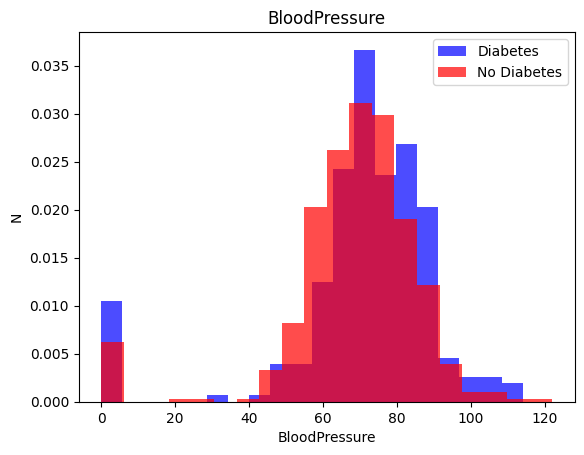

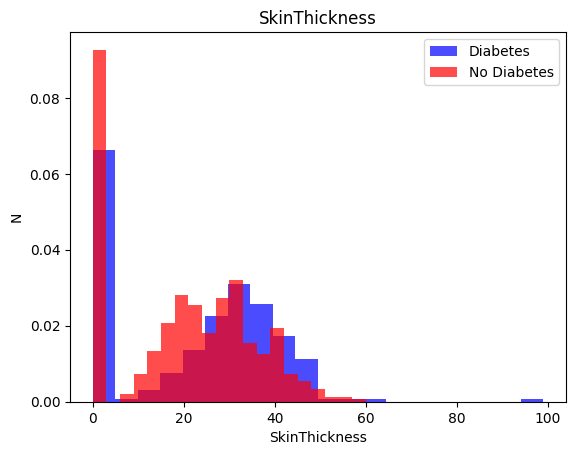

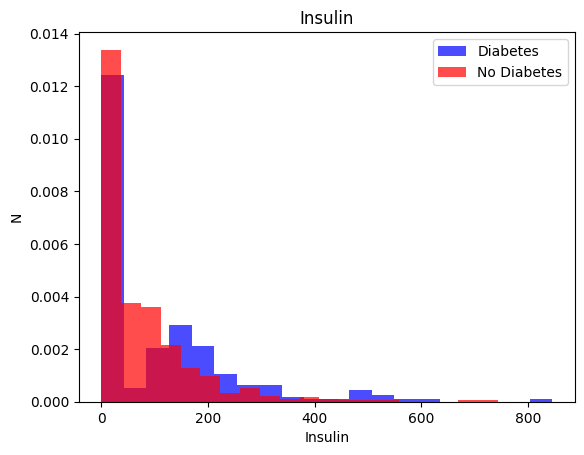

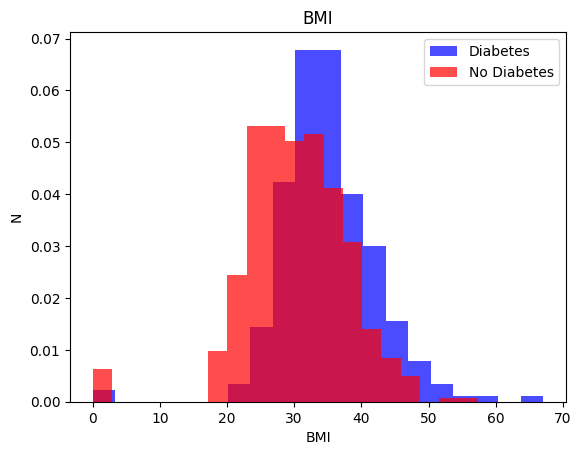

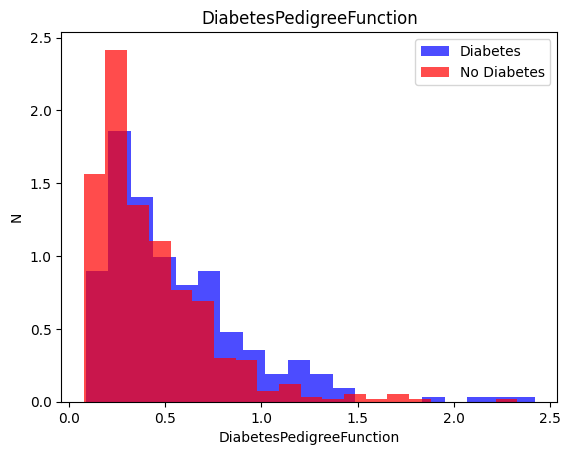

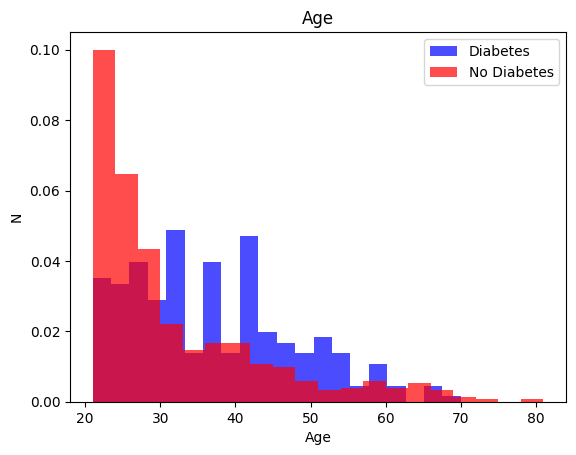

In [45]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=20)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='No Diabetes', alpha=0.7, density=True,bins=20)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [46]:
x_train, x_test_all, y_train, y_test_all = train_test_split(x, y, test_size=0.4, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_all, y_test_all, test_size=0.5, random_state=0)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics =['accuracy'])

In [49]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6550


[0.646811842918396, 0.6549999713897705]

In [50]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.5400


[0.6647518277168274, 0.5400000214576721]

In [51]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.6269 - accuracy: 0.6733 - val_loss: 0.6179 - val_accuracy: 0.6650
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5885 - accuracy: 0.7083 - val_loss: 0.5851 - val_accuracy: 0.7050
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5618 - accuracy: 0.7250 - val_loss: 0.5624 - val_accuracy: 0.7150
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7283 - val_loss: 0.5479 - val_accuracy: 0.7150
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7300 - val_loss: 0.5355 - val_accuracy: 0.7150
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7300 - val_loss: 0.5264 - val_accuracy: 0.7150
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7317 - val_loss: 0.5200 - val_accuracy: 0.7150
Epoch 8/20
38/38 [==